<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 3: Cross Validation
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>Alireza Gregory Motlaq - Peyman Naseri - Alireza Heydari - Mohammad Mahdi Vahedi</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#0">
            0. Introduction
        </a>
    </li> <br>
    <li>
        <a href="#1">
            1. Hyperparameters
        </a>
    </li>
    <ul>
        <li>
            <a href="#1-1">
                1-1. Introduction to Dataset
            </a>
        </li>
        <li>
            <a href="#1-2">
                1-2. Creating Dataset
            </a>
        </li>
        <li>
            <a href="#1-3">
                1-3. Visualizing Dataset
            </a>
        </li>
        <li>
            <a href="#1-3">
                1-3. Hyperparameters Effects
            </a>
        </li>
    </ul> <br>
    <li>
        <a href="#-2">
            2. K-Fold Cross Validation
        </a>
    </li>
    <ul>
        <li>
            <a href="#2-1">
                2-1. Dataset
            </a>
        </li>
        <li>
            <a href="#2-2">
                2-2. Model
            </a>
        </li>
        <li>
            <a href="#2-3">
                2-3. Validation
            </a>
        </li>
    </ul>
</div>

<font face="Times New Roman"><div id="0">
# <font color="#800080" size=6>**0. Introduction**</font>
</div>

<font face="Times New Roman" size=3>
First, to learn about Validation and SVM, refer to their notebooks.

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Hyperparameters**</font>
</div>

<font face="Times New Roman"><div id="1-1">
## <font color="#800080" size=6>**1-1. Introduction to Dataset** </font>
</div>

<font face="Times New Roman" size=3><div>
We use [spiral](https://en.wikipedia.org/wiki/Spiral) synthetic dataset.
</div>

<font face="Times New Roman"><div id="1-2">
## <font color="#800080" size=6>**1-2. Creating Dataset**</font>
</div>

<font face="Times New Roman" size=3>
We use the <code>make_spiral</code> function to generate dataset.

In [67]:
from ipywidgets import interact, FloatLogSlider, Checkbox
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [68]:
def make_spiral(density=1, max_radius=6.5, c=0):
    """ Generate spiral dataset.

    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
        c (int) : Class of this spiral

    Returns:
        array: Return spiral data and its class
    """

    # Spirals data and labels
    data, labels = [], []

    # Number of interior data points to generate
    N = 96 * density

    # Generate points
    for i in range(0, N):
        angle = (i * math.pi) / (16 * density)
        # Radius is the maximum radius * the fraction of iterations left
        radius = max_radius * ((104 * density) - i) / (104 * density)

        # Get x and y coordinates
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)

        data.append([x, y])
        labels.append([c])

    return data, labels

In [69]:
def make_spirals(density=1, max_radius=6.5):
    """ Generate two class spiral dataset.

    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
    Returns:
        array: Return spirals data and its class
    """
    data , labels = [], []

    # First spirals data and class
    data1, labels1 = make_spiral(density, max_radius)

    # Construct complete two spirals dataset
    for d in data1:
        data.append(d)  # First spirals coordinate
        data.append([-d[0], -d[1]])  # Second spirals coordinate

    # Construct complete two spirals classes
    for lbl in labels1:
        labels.append(lbl)  # First spirals class
        labels.append([1])  # Second spirals class

    return np.array(data), np.array(labels).ravel()

In [70]:
X, y = make_spirals()

<font face="Times New Roman"><div id="1-3">
## <font color="#800080" size=6>**1-3. Visualizing Dataset**</font>
</div>

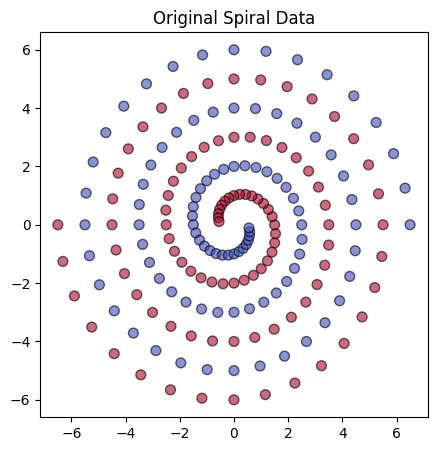

In [71]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Original Spiral Data")
plt.show()

<font face="Times New Roman"><div id="1-4">
## <font color="#800080" size=6>**1-4. Hyperparameters Effects**</font>
</div>

<font face="Times New Roman" size=3>
In the following, we use <code>svc</code> model from <code>sklearn.svm</code> and for different combinations of hyperparameters $C$ and $\gamma$, we draw the division area of two classes at the same time so that we can compare them with each other.

In [72]:
C_range = [0.1, 10, 1000]
gamma_range = [0.1, 1, 10]

classifiers = []

for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((clf, C, gamma))

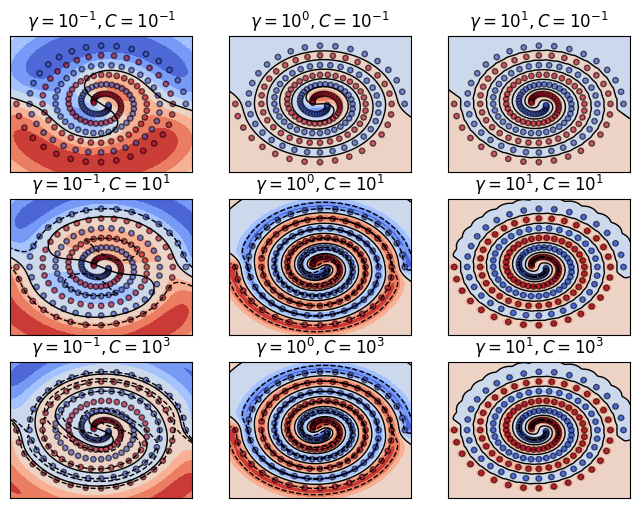

In [73]:
plt.figure(figsize=(8, 6))

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

for i, (clf, C, gamma) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), i + 1)
    plt.title("$\gamma = 10^{%d}, C = 10^{%d}$" % (np.log10(gamma), np.log10(C)))

    # visualize parameter's effect on decision function
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    plt.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

plt.show()

<font face="Times New Roman"><div id="2">
# <font color="#800080" size=6>**2. K-Fold Cross Validation**</font>
</div>

<font face="Times New Roman"><div id="2-1">
## <font color="#800080" size=6>**2-1. Dataset** </font>
</div>

<font face="Times New Roman" size=3>
We use the spiral dataset from the previous section and only divide the dataset into two parts: train and validation.

In [74]:
# split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

<font face="Times New Roman"><div id="2-2">
## <font color="#800080" size=6>**2-2. Model** </font>
</div>

<font face="Times New Roman" size=3>
We try to find the best $\gamma$ and $C$ using k-fold CV method and Grid Search.

In [75]:
# Specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

In [76]:
# Create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

In [77]:
# Train
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])})

<font face="Times New Roman"><div id="2-3">
## <font color="#800080" size=6>**2-3. Validation** </font>
</div>

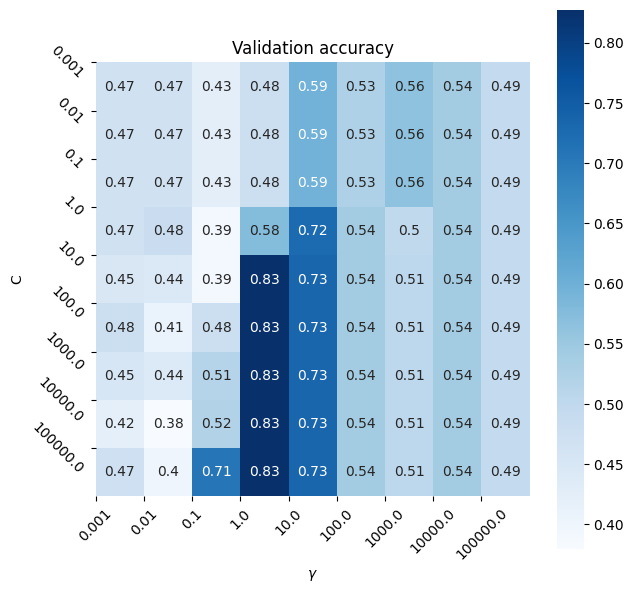

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.83


In [78]:
# Draw heatmap of the validation accuracy as a function of gamma and C
import seaborn as sns

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))
sns.heatmap(scores, annot=True, cmap='Blues', square=True);
plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show();

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))